In [1]:
# download dataset
from tensorflow.keras.datasets.fashion_mnist import load_data

(xtrain,ytrain),(xtest,ytest)=load_data()
print(xtrain.shape,xtest.shape)

(60000, 28, 28) (10000, 28, 28)


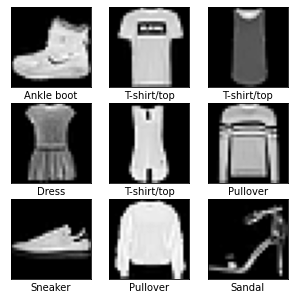

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
        'Sandal','Shirt','Sneaker','Bag','Ankle boot']
sample_size=9
rand_idx=np.random.randint(60000,size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(rand_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtrain[i],cmap='gray')
    plt.xlabel(class_names[ytrain[i]])
plt.show()

In [3]:
# data preprocessing
xtrain=xtrain/255
xtest=xtest/255

# label preprocessing
from tensorflow.keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

#validation dataset
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,
                                        test_size=.3)


In [4]:
# model 1.
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

model=Sequential()

model.add(Flatten(input_shape=(28,28)))    # 28,28 to 784
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
# compile
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [6]:
# train
history=model.fit(xtrain,ytrain,
                 epochs=30,
                 batch_size=128,
                 validation_data=(xval,yval))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6443 - acc: 0.7753 - val_loss: 0.4704 - val_acc: 0.8412
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4427 - acc: 0.8468 - val_loss: 0.4809 - val_acc: 0.8297
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4052 - acc: 0.8573 - val_loss: 0.4150 - val_acc: 0.8565
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3808 - acc: 0.8644 - val_loss: 0.4047 - val_acc: 0.8566
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3611 - acc: 0.8723 - val_loss: 0.3818 - val_acc: 0.8628
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3425 - acc: 0.8775 - val_loss: 0.3761 - val_acc: 0.8633
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3311 - acc: 0.8800 - val_loss: 0.3541 - val_acc: 0.8716
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [7]:
# model 2.deep
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

model2=Sequential()

model2.add(Flatten(input_shape=(28,28)))    # 28,28 to 784
model2.add(Dense(128,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(10,activation='softmax'))

# compile
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

# train
history2=model2.fit(xtrain,ytrain,
                 epochs=30,
                 batch_size=128,
                 validation_data=(xval,yval))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6028 - acc: 0.7948 - val_loss: 0.4496 - val_acc: 0.8454
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4186 - acc: 0.8508 - val_loss: 0.3994 - val_acc: 0.8587
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3736 - acc: 0.8644 - val_loss: 0.4062 - val_acc: 0.8557
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3501 - acc: 0.8719 - val_loss: 0.3503 - val_acc: 0.8736
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3226 - acc: 0.8820 - val_loss: 0.3538 - val_acc: 0.8694
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3062 - acc: 0.8874 - val_loss: 0.3378 - val_acc: 0.8762
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2920 - acc: 0.8916 - val_loss: 0.3439 - val_acc: 0.8756
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

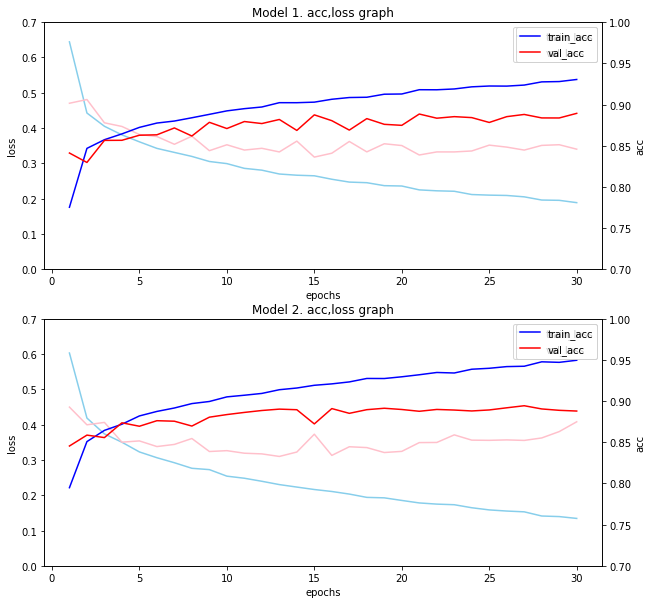

<Figure size 720x360 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt


his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']
acc=his_dict['acc']
val_acc=his_dict['val_acc']
epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,1,1)
ax1.plot(epochs,loss,color='skyblue',label='train_loss')
ax1.plot(epochs,val_loss,color='pink',label='val_loss')
ax1.set_title('Model 1. acc,loss graph')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
ax1.set_ylim(0,.7)
ax2=ax1.twinx()
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='red',label='val_acc')
ax2.set_ylabel('acc')
ax2.set_ylim(.7,1)

ax2.legend()

#####

ax1=fig.add_subplot(2,1,2)
his_dict=history2.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']
acc=his_dict['acc']
val_acc=his_dict['val_acc']
epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))
ax1.plot(epochs,loss,color='skyblue',label='train_loss')
ax1.plot(epochs,val_loss,color='pink',label='val_loss')
ax1.set_title('Model 2. acc,loss graph')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

ax2=ax1.twinx()
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='red',label='val_acc')
ax2.set_ylabel('acc')
ax2.legend()
ax1.set_ylim(0,.7)
ax2.set_ylim(.7,1)
plt.show()
